In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime

In [4]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('/content/AirPassengers (3).csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

<ipython-input-4-2c443bec627a>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('/content/AirPassengers (3).csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)


In [5]:
print(data.head())
print('\n Parsed Data')
print(data.dtypes)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

 Parsed Data
#Passengers    int64
dtype: object


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
ts = data['#Passengers']
ts.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [8]:
ts['1949-04-01']

129

In [9]:
ts[datetime(1949,1,1)]

112

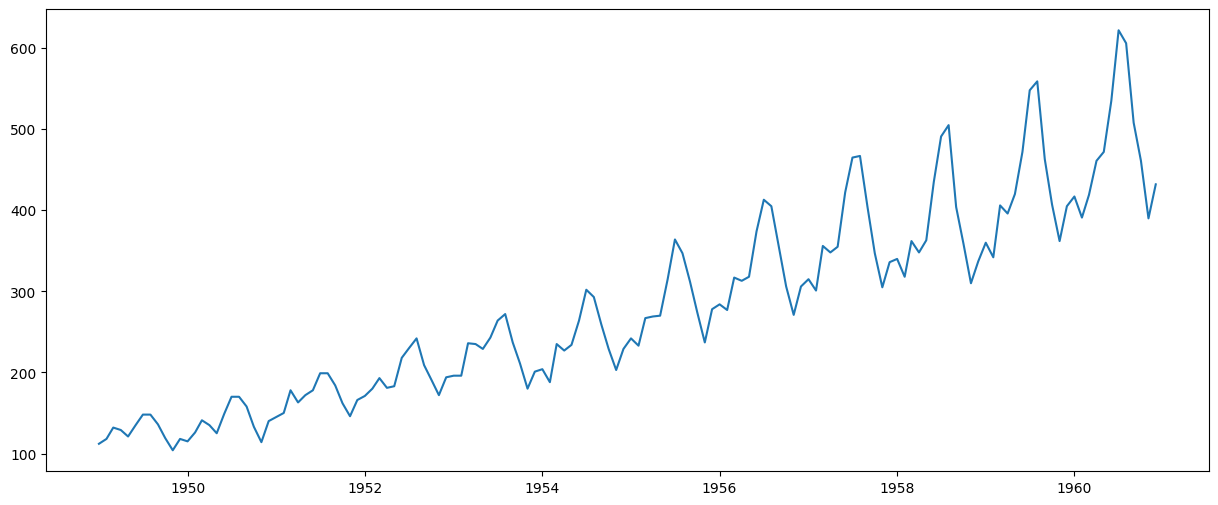

In [10]:
plt.plot(ts)

In [11]:
#Stationary Test

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  rolmean = pd.Series(timeseries).rolling(window=12).mean()
  rolstd = pd.Series(timeseries).rolling(window=12).std()

  #plotting all 3 plots- original, mean and std
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling mean')
  std = plt.plot(rolstd, color='black', label='Rolling std')

  plt.legend(loc='best')
  plt.title('Rolling mean and Standard Deviation')
  plt.show(block='False')

  #Performing Dickey-fuller test

  print('Results of Dickey-fuller test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '#lags', 'number of observations used'])
  for key, value in dftest[4].items():
    dfoutput['critical Value(%s)'%key] = value
    print(dfoutput)


In [13]:
ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


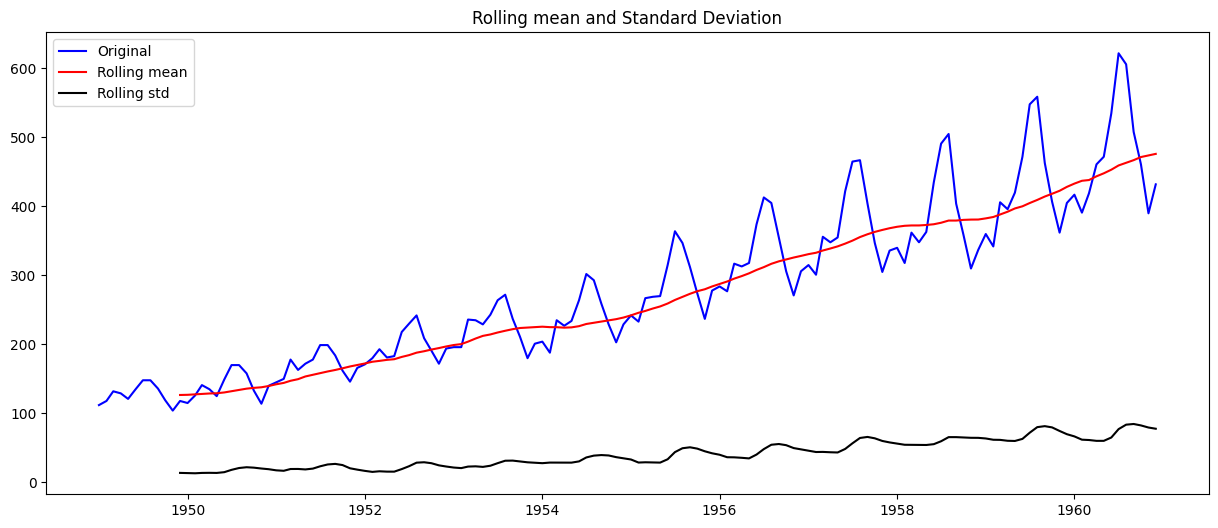

Results of Dickey-fuller test:
test statistic                   0.815369
p-value                          0.991880
#lags                           13.000000
number of observations used    130.000000
critical Value(1%)              -3.481682
dtype: float64
test statistic                   0.815369
p-value                          0.991880
#lags                           13.000000
number of observations used    130.000000
critical Value(1%)              -3.481682
critical Value(5%)              -2.884042
dtype: float64
test statistic                   0.815369
p-value                          0.991880
#lags                           13.000000
number of observations used    130.000000
critical Value(1%)              -3.481682
critical Value(5%)              -2.884042
critical Value(10%)             -2.578770
dtype: float64


In [14]:
test_stationarity(ts)

In [15]:
# so the Result of the Dickey-fuller test shows that P-value is greater than 0.05 which means this timeseries data is not Stationary

In [16]:
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
#Transformation test

In [18]:
#log test
ts_log = np.log(ts)
ts_log.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


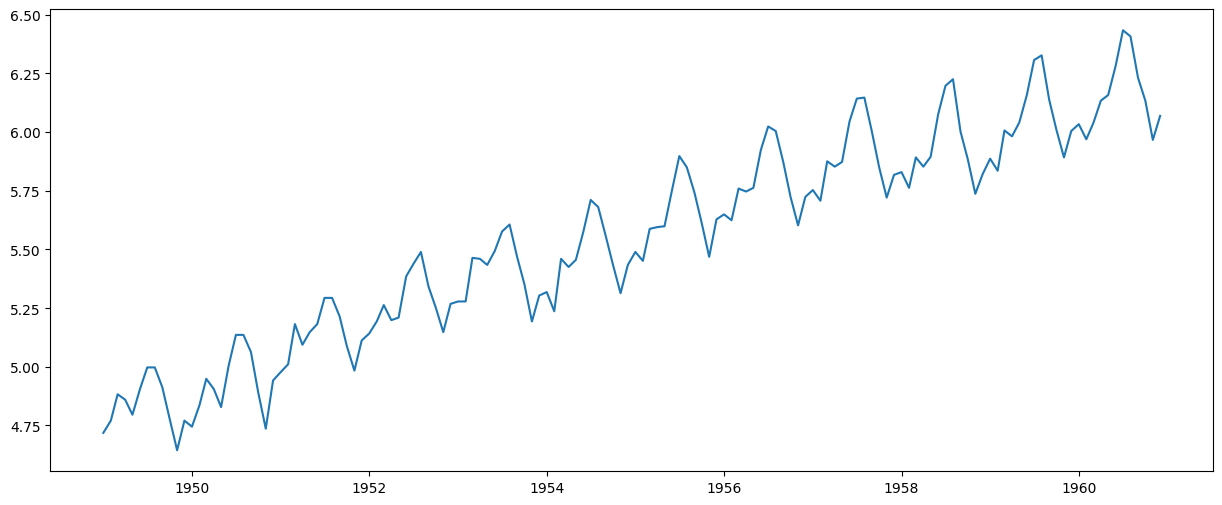

In [19]:
plt.plot(ts_log)

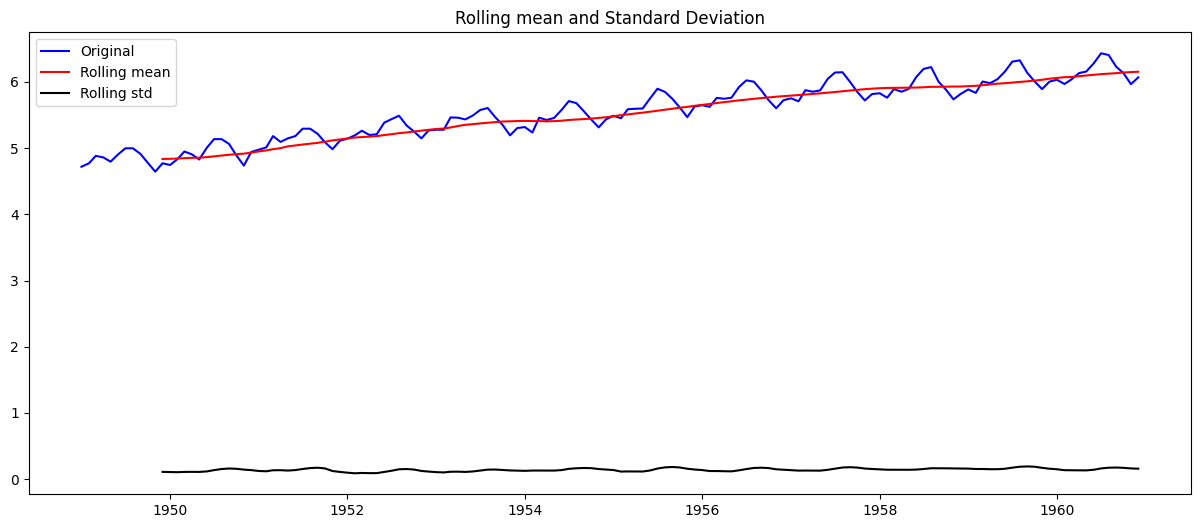

Results of Dickey-fuller test:
test statistic                  -1.717017
p-value                          0.422367
#lags                           13.000000
number of observations used    130.000000
critical Value(1%)              -3.481682
dtype: float64
test statistic                  -1.717017
p-value                          0.422367
#lags                           13.000000
number of observations used    130.000000
critical Value(1%)              -3.481682
critical Value(5%)              -2.884042
dtype: float64
test statistic                  -1.717017
p-value                          0.422367
#lags                           13.000000
number of observations used    130.000000
critical Value(1%)              -3.481682
critical Value(5%)              -2.884042
critical Value(10%)             -2.578770
dtype: float64


In [20]:
test_stationarity(ts_log)

In [21]:
#still not meeting the idea values to state stationary, so we need to continue with transformation test

In [22]:
#double log test

In [23]:
ts_doublelog = np.log(ts_log)
ts_doublelog.head()

,#Passengers
Month,
1949-01-01,1.551491
1949-02-01,1.562490
1949-03-01,1.585719
1949-04-01,1.581000
1949-05-01,1.567739


In [24]:
ts_doublelog.tail()

,#Passengers
Month,
1960-08-01,1.857372
1960-09-01,1.829454
1960-10-01,1.813749
1960-11-01,1.786101
1960-12-01,1.803099


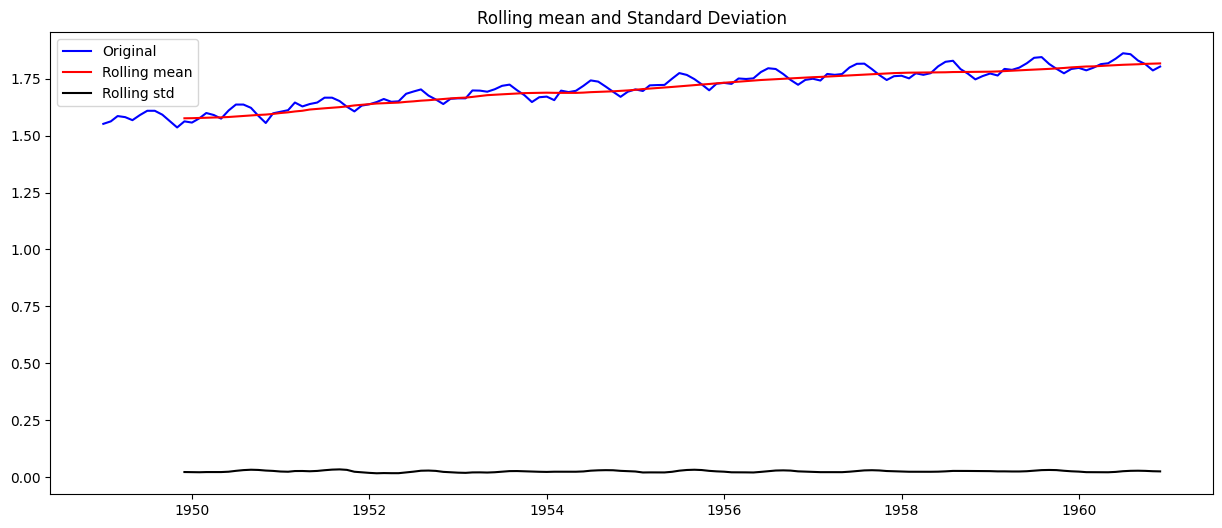

Results of Dickey-fuller test:
test statistic                  -2.156028
p-value                          0.222590
#lags                           13.000000
number of observations used    130.000000
critical Value(1%)              -3.481682
dtype: float64
test statistic                  -2.156028
p-value                          0.222590
#lags                           13.000000
number of observations used    130.000000
critical Value(1%)              -3.481682
critical Value(5%)              -2.884042
dtype: float64
test statistic                  -2.156028
p-value                          0.222590
#lags                           13.000000
number of observations used    130.000000
critical Value(1%)              -3.481682
critical Value(5%)              -2.884042
critical Value(10%)             -2.578770
dtype: float64


In [25]:
test_stationarity(ts_doublelog)

In [26]:
#still not meeting the idea values to state stationary, so we need to continue with transformation test

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


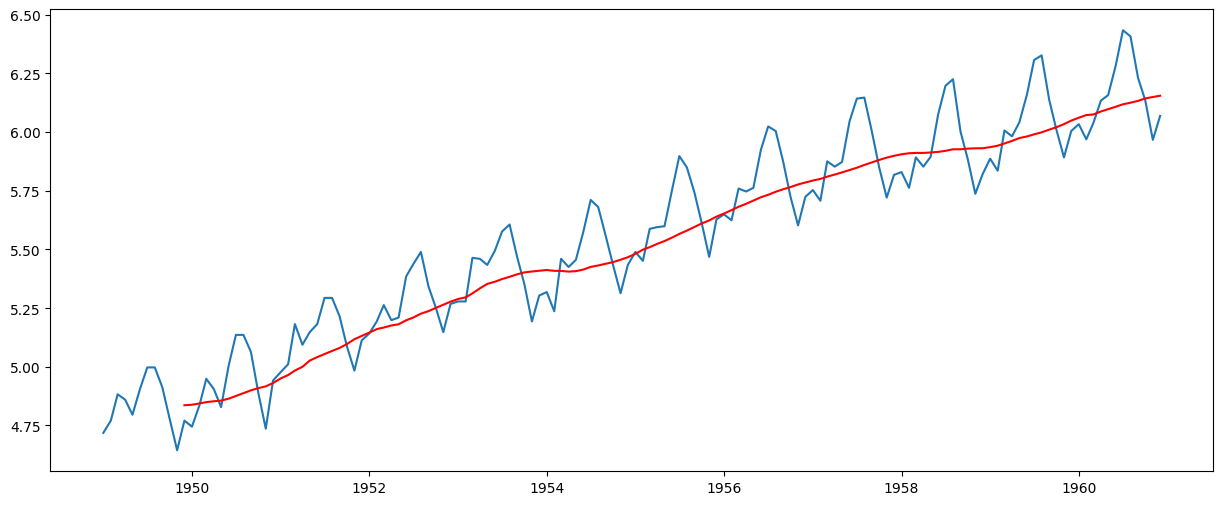

In [27]:
#smoothing test
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

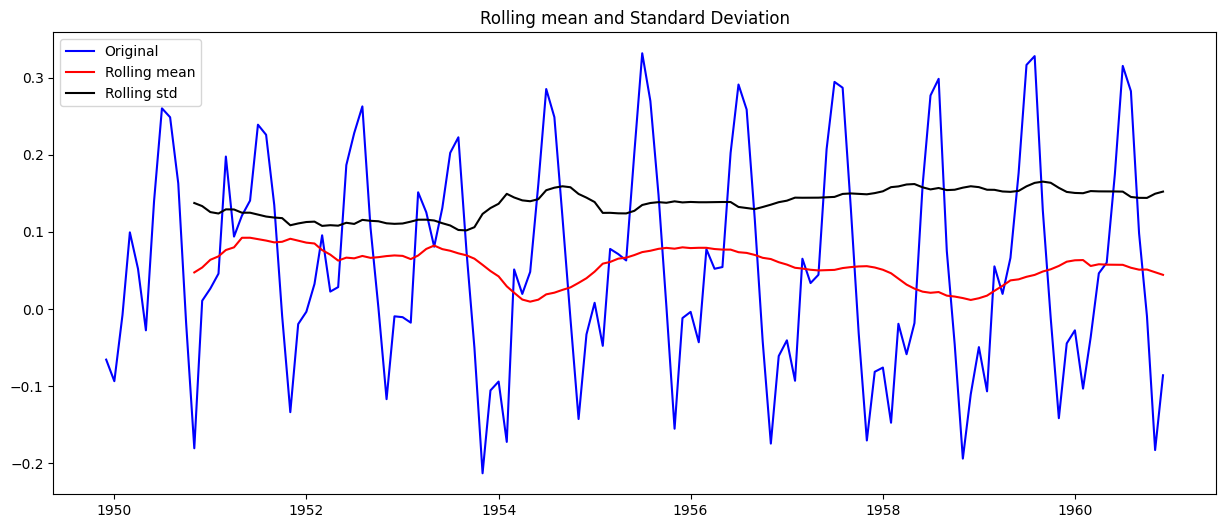

Results of Dickey-fuller test:
test statistic                  -3.162908
p-value                          0.022235
#lags                           13.000000
number of observations used    119.000000
critical Value(1%)              -3.486535
dtype: float64
test statistic                  -3.162908
p-value                          0.022235
#lags                           13.000000
number of observations used    119.000000
critical Value(1%)              -3.486535
critical Value(5%)              -2.886151
dtype: float64
test statistic                  -3.162908
p-value                          0.022235
#lags                           13.000000
number of observations used    119.000000
critical Value(1%)              -3.486535
critical Value(5%)              -2.886151
critical Value(10%)             -2.579896
dtype: float64


In [28]:
test_stationarity(ts_log_moving_avg_diff)

In [29]:
#now it meets the P-value to be below 0.05 and its stationary , by using the diff smooting technic.

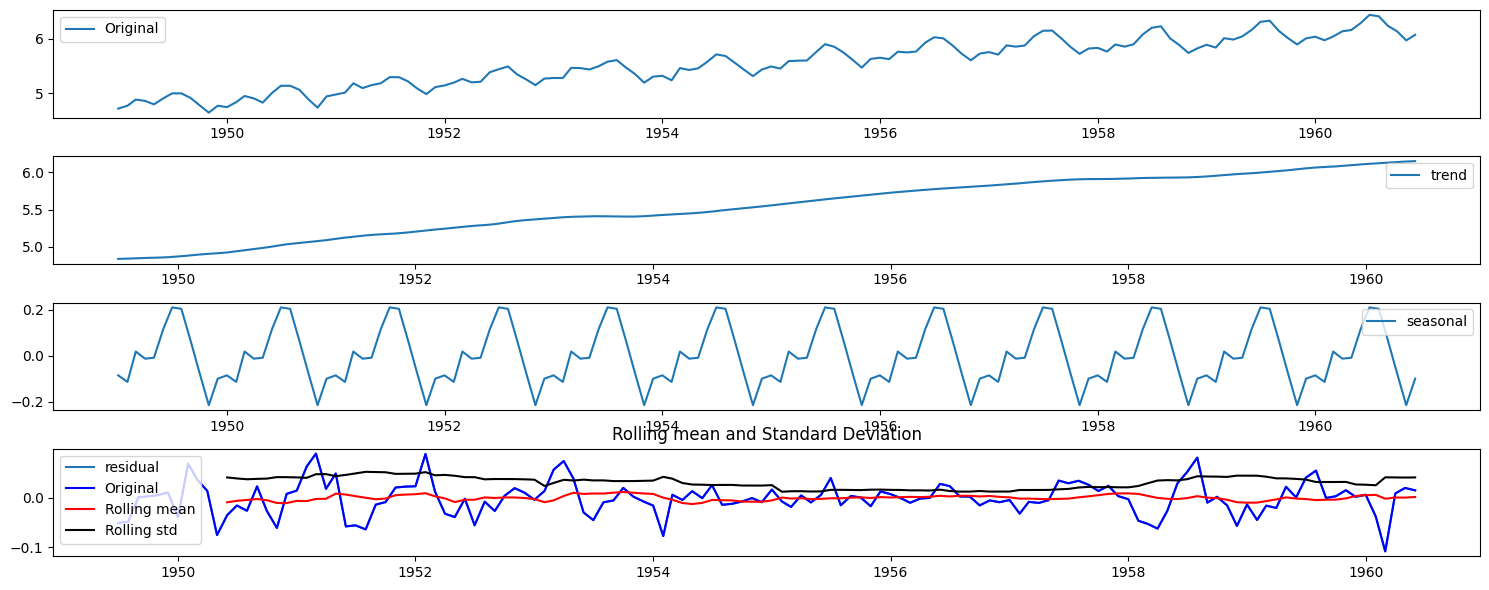

Results of Dickey-fuller test:
test statistic                -6.332387e+00
p-value                        2.885059e-08
#lags                          9.000000e+00
number of observations used    1.220000e+02
critical Value(1%)            -3.485122e+00
dtype: float64
test statistic                -6.332387e+00
p-value                        2.885059e-08
#lags                          9.000000e+00
number of observations used    1.220000e+02
critical Value(1%)            -3.485122e+00
critical Value(5%)            -2.885538e+00
dtype: float64
test statistic                -6.332387e+00
p-value                        2.885059e-08
#lags                          9.000000e+00
number of observations used    1.220000e+02
critical Value(1%)            -3.485122e+00
critical Value(5%)            -2.885538e+00
critical Value(10%)           -2.579569e+00
dtype: float64


In [30]:
#Decompositon
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [31]:
 from statsmodels.tsa.arima.model import ARIMA

Text(0.5, 1.0, 'Autocorrelation Function')

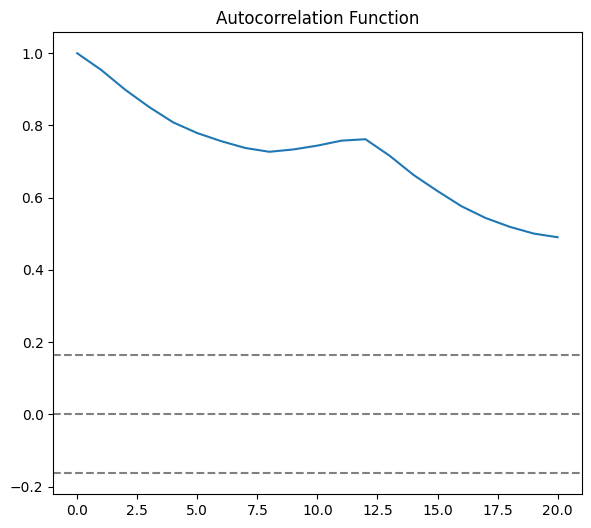

In [32]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log, nlags=20, method='ols')


#Plotting ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)), linestyle="--", color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)), linestyle="--", color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

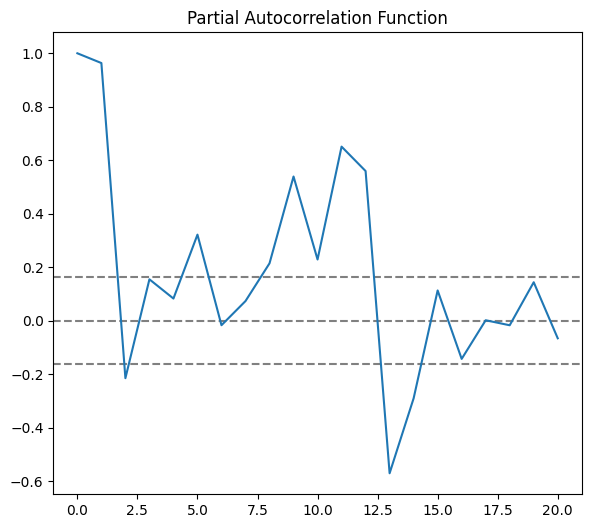

In [33]:
#Plotting PACF

plt.subplot(122)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)), linestyle='--', color='gray')
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation Function')

In [34]:
#Model Building

ts_values = ts_log.values
x = ts_values
size = int(len(x)*0.667)
train, test = x[0:size], x[size:len(x)]


In [35]:
len(train)

96

In [36]:
len(test)

48

In [37]:
#AR Model
#training will be 66%, test will be 33% as per our model

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [38]:
history = [x for x in train]
predictions = list()
#test.reset_index()
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4,1,2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)

from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

predicted=5.774141, expected=5.752573
predicted=5.722150, expected=5.707110
predicted=5.731505, expected=5.874931
predicted=5.903622, expected=5.852202
predicted=5.815891, expected=5.872118
predicted=5.924785, expected=6.045005
predicted=6.023174, expected=6.142037
predicted=6.118355, expected=6.146329
predicted=6.173341, expected=6.001415
predicted=5.887091, expected=5.849325
predicted=5.800561, expected=5.720312
predicted=5.794394, expected=5.817111
predicted=5.859294, expected=5.828946
predicted=5.792696, expected=5.762051
predicted=5.793265, expected=5.891644
predicted=5.919774, expected=5.852202
predicted=5.807143, expected=5.894403
predicted=5.932723, expected=6.075346
predicted=6.066207, expected=6.196444
predicted=6.191349, expected=6.224558
predicted=6.258998, expected=6.001415
predicted=5.890675, expected=5.883322
predicted=5.858096, expected=5.736572
predicted=5.699381, expected=5.820083
predicted=5.928300, expected=5.886104
predicted=5.904793, expected=5.834811
predicted=5.

In [39]:
ts.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [40]:
ts_log.head(5)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


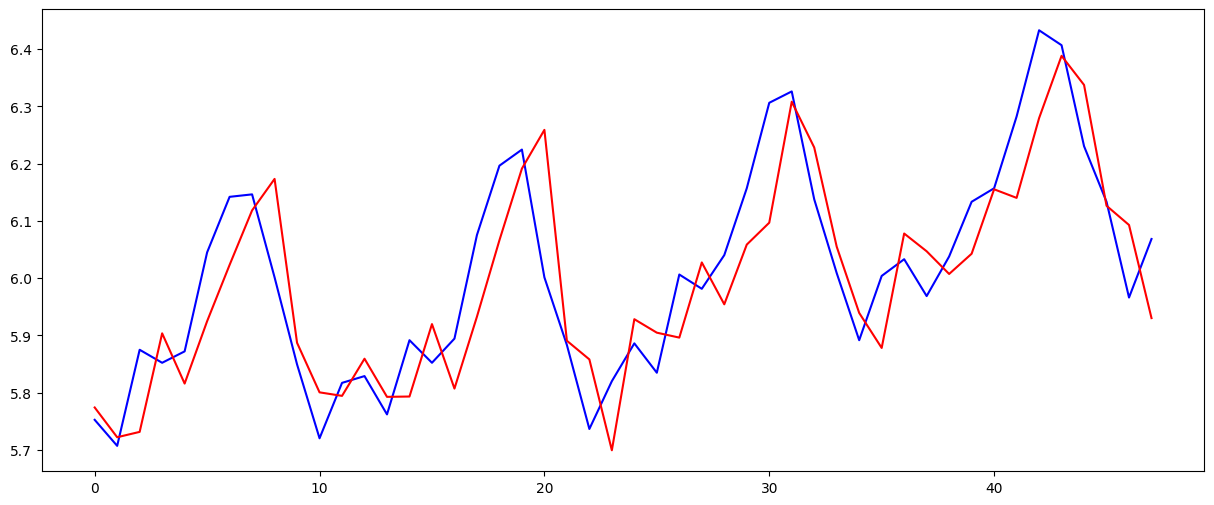

In [41]:
plt.plot(test, color = 'blue', label='test')
plt.plot(predictions, color='red', label='pred')
plt.show()

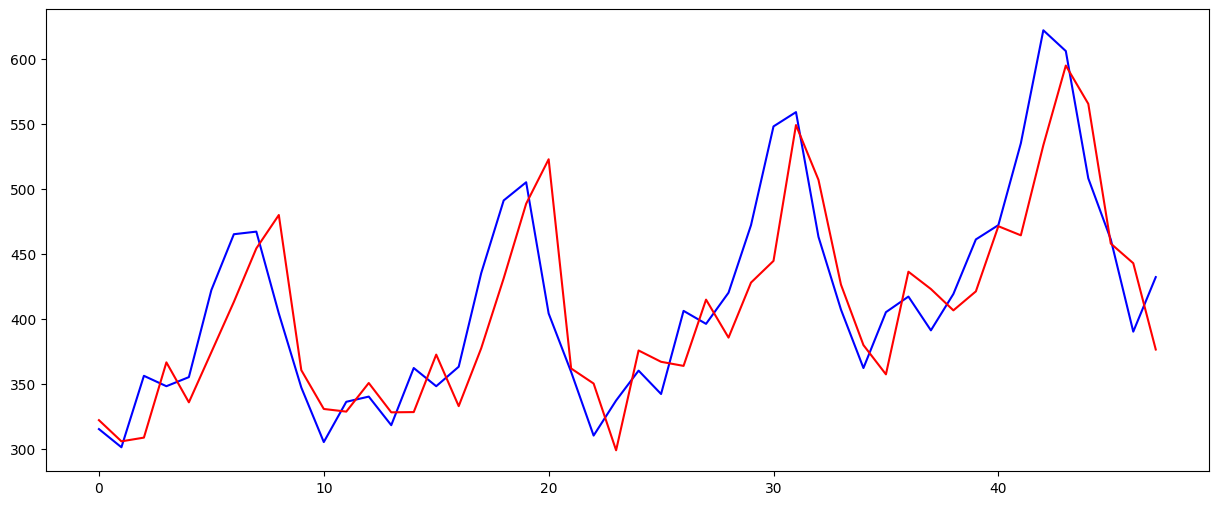

In [42]:
plt.plot(np.exp(test), color='blue', label='test')
plt.plot(np.exp(predictions), color='red', label='pred')
plt.show()

In [43]:

from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Mean Squarred Error: %.2f'% rms)

Mean Squarred Error: 43.12


In [44]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.9 MB/s eta 0:00:00


In [45]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(train, start_p=1, start_q=1, d=1, max_p=4, max_q=4, start_P=1,
                         D=None, start_Q=1, max_P=4, max_D=1, max_Q=4, max_order=5, m=1,
                         seasonal=True, stationary=False, information_criterion='aic',
                         alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True,
                         n_jobs=1, start_params=None, trend=None, method='lbfgs',
                         maxiter=50, offset_test_args=None, seasonal_test_args=None,
                         suppress_warnings=True, error_action='trace', trace=False,
                         random=False, random_state=None, n_fits=10,
                         return_valid_fits=False, out_of_sample_size=0,
                         scoring='mse', scoring_args=None, with_intercept='auto',
                         sarimax_kwargs=None)

In [46]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(4, 1, 2)   Log Likelihood                  97.995
Date:                Tue, 17 Dec 2024   AIC                           -179.991
Time:                        10:31:19   BIC                           -159.560
Sample:                             0   HQIC                          -171.735
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0112      0.003      4.435      0.000       0.006       0.016
ar.L1          0.0658      0.155      0.424      0.671      -0.238       0.370
ar.L2          0.3865      0.157      2.458      0.014       0.078       0.695
ar.L3         -0.2734      0.125     -2.182      0.029      -0.519      -0.028
ar.L4         -0.1824      0.122     -1.496      0.135      -0.421       0.057
ma.L1         -0.0734      0.121     -0.604      0.546      -0.311       0.165
ma.L2         -0.8502      0.128     -6.655      0.000      -1.101      -0.600
sigma2         0.0072      0.002      4.225      0.000       0.004       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 4.09
Prob(Q):                              0.54   Prob(JB):                         0.13
Heteroskedasticity (H):               0.83   Skew:                             0.15
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
prediction_arima_model = pd.DataFrame(arima_model.predict(n_periods=len(test)))
prediction_arima_model.columns = ['predicted_sales']

np.exp(prediction_arima_model)

,predicted_sales
0,343.245041
1,364.098421
2,382.167624
3,375.963261
4,372.883915
5,365.625033
6,366.495468
7,369.810091
8,377.128998
9,384.330894


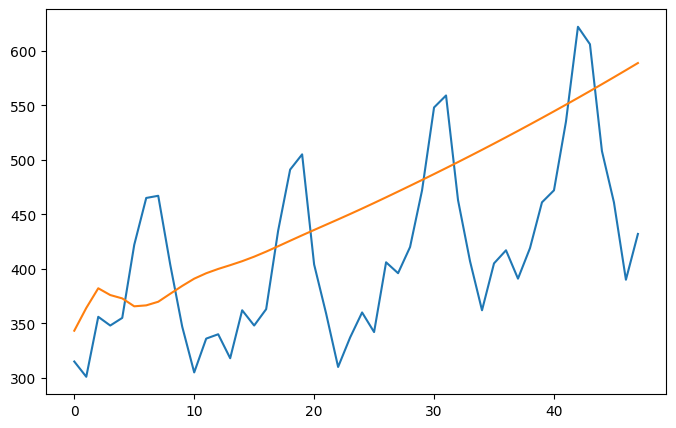

In [48]:
plt.figure(figsize=(8,5))
plt.plot(np.exp(test), label='test')
plt.plot(np.exp(prediction_arima_model), label='Predictions')
plt.show()